# Foundation of Data Science
## Homework 4 

Student Name: Pruthviraj R Patil

Student Netid: prp7650
***

### Part 1: Critique this plan (10 points)
1\. After a few beers your CIO invited his buddy from Green Berry consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Green Berry, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Green Berry says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Green Berry's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Green Berry Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Green Berry) have a 
large database of consumers who can be targeted.  We will build a predictive model 
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a decision tree (DT) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of 
this service.  The model will be based on their demographics and their usage of 
the service. We believe that DT is the best choice of method be-
cause it is a tried-and-true modeling technique, and we can easily 
interpret the model to infer whether the attributes make sense. We will apply the model to our large 
database of consumers, and select out those who have not yet subscribed and whom
the DT model predicts to be likely to subscribe.  To these we will send 
the targeted offer. As this is a fixed-profit-per-customer service, this also 
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

**Write your answer here.**


#### Response:

1. The current customer subscription pattern isnt related to the future subscribers given that previous efforts being just a word-of-mouth campaign to target customers previously. So, actually there is no previous data on the target variable of alluring customers (which customer actually subscribes based on demographics and their usage of the service).

    Fix : To get prepare the data properly in a structured manner such that there is a dependent variable for demographics and usage patterns.


2. There can be multiple factors that can be resulting in the users to subscribe to the service. The word-of-mouth doesnt really mean just the demographics and the usage pattern would help us to find which user might subscribe for the service. 

    Fix: Try exploring other factors that can affect the subscribers count too other than just demographics and usage patterns.


3. Decision Tree can be expensive in training it over the large database of customers. Also, if the attributes other than Demographics and user patterns are added dynamically, the cost of execution using DT gets increases.  
      
    Fix: Leverage other models too like SVM that doesnt depend on the number of attributes in a dataset. This will help in dynamic attribute addition and retraining with minute increase in cost of execution. 


4. In the case of model evaluation, it is unclear which metric has to be used. So, a proper use of TP, FP, TN, FN had to be decide before constructing the data pipeline. 

    Fix :In this case, recall metric is the most useful as we are only interested in knowing more that if the user wants to use the service than if the user doesn't want to use

### Part 2: Working with Time Series (5 points)

Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008 (use file cases.csv for this section).

1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools and the library statsmodels). (1 point)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib as mlib
from statsmodels.regression.linear_model import OLS
import numpy as np
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score

In [2]:
#write your code here
parser_format = lambda x: pd.datetime.strptime(x,'%Y')
df = pd.read_csv('cases.csv', engine='python',parse_dates=[0], index_col = 'YEAR', date_parser = parser_format)
st_year = pd.to_datetime("1700-01-01")
df = df[st_year:]
df.head()

<ipython-input-2-965eb5321727>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parser_format = lambda x: pd.datetime.strptime(x,'%Y')


,YFCASES
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


2\. Plot the autocorrelation function (ACF) for the cases timeseries (hint: use statsmodels plot_acf for that). (2 points)

To learn more about how to interpret these graphs, you may find this useful: https://medium.com/analytics-vidhya/interpreting-acf-or-auto-correlation-plot-d12e9051cd14

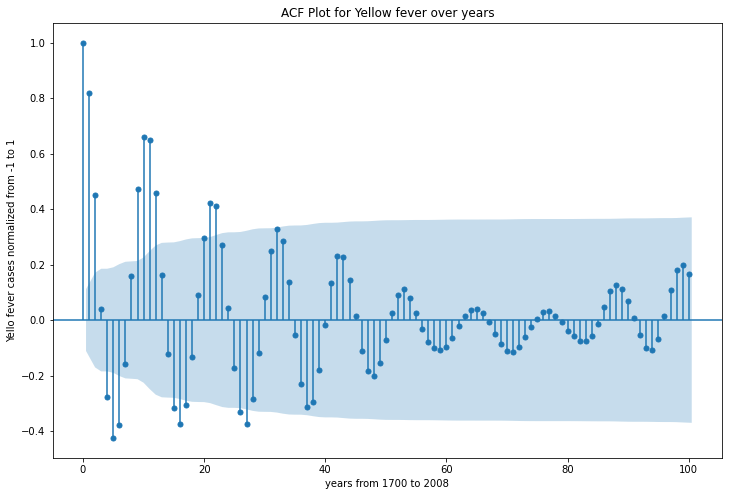

In [3]:
#write your code here
fig, ax = plt.subplots(figsize=(12, 8))
ax.set(ylabel='Yello fever cases normalized from -1 to 1', xlabel='years from 1700 to 2008')

acf = plot_acf(df.YFCASES, lags=100, title="ACF Plot for Yellow fever over years", ax=ax)

3\. An approach to assess the presence of a significant autocorrelation in the data is to use the Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is the DW for our data? Does this suggest that the data has a relatively high or a relatively low autocorrelation? (2 point) 


The DW statistic for the data is 0.351. This suggests that the errors are highly correlated.

In [4]:
def dwFinder(df):
    temp = OLS(df, np.ones(len(df))).fit()
    return durbin_watson(temp.resid)

dwFinder(df['YFCASES'])

0.35126855165831666

### Part 3: Comparison of Models (10 points)

In this part we will be looking at data generated by particle physicists to test if machine learning can help classify whether certain particle decay experiments identify the presence of a Higgs Boson. One does not need to know anything about particle physics to do well here, but if you are curious, full feature and data descriptions can be found here:

- https://www.kaggle.com/c/higgs-boson/data
- http://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

The goal of this assignment is to practice how to compare different classification models using the area under the ROC curve (AUC). 


1\. Create a data preparation and cleaning function that does the following:
- Has a single input that is a file name string
- Reads data (the data is comma separated, has a row header and the first column `EventID` is the index) into a pandas `dataframe`
- Cleans the data
  - Convert the feature `Label` to numeric (choose the minority class to be equal to 1)
    - Create a feature `Y` with numeric label
    - Drop the feature `Label`
  - If a feature has missing values (i.e., `-999`): 
    - Create a dummy variable for the missing value
      - Call the variable `orig_var_name` + `_mv` where `orig_var_name` is the name of the actual var with a missing value
      - Give this new variable a 1 if the original variable is missing
    - Replace the missing value with the average of the feature (make sure to compute the mean on records where the value isn't missing). You may find pandas' `.replace()` function useful.
- After the above is done, rescales the data so that each feature has zero mean and unit variance (hint: look up sklearn.preprocessing)
- Returns the cleaned and rescaled dataset

Hint: as a guide, this function can easily be done in less than 15 lines. (2 points)

In [5]:
#write your code here
def clean_cols(col, index):
    clean_vals=[]
    for i in index:
        if col[i]!=-999:
            clean_vals.append(col[i])
    avg_val=(sum(clean_vals)/len(clean_vals))
        
    for i in index:
        if col[i]==-999:
            col[i]=avg_val
    return col

def data_prep_pipeline(filename):
    #import the dataset
    df=pd.read_csv(filename, index_col = 'EventId')
    #label encoding
    y=[]
    labels=df['Label']
    del(df['Label'])
    for i in range(len(df.index)):
        labels[df.index[i]]
        if labels[df.index[i]]=="s":
            y.append(0)
        else:
            y.append(1)    
    df['Y']=y
        
    #data_cleaning (null values handling)
    df_x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]
    
    col_names=list(df_x.columns)
    for col in col_names:
        temp_col=df_x[col]
        df_x[col+"_mv"]=clean_cols(temp_col, df_x.index)
        del(df_x[col])
    
    #normalizing the data
    col_names=[i+"_mv" for i in col_names]
    index=list(df_x.index)
    df_x=StandardScaler().fit_transform(df_x.values)
    x=pd.DataFrame(df_x, columns = col_names)
    x.index=y.index
    
    df=pd.concat([x, y], axis=1)
    return df

2\. Clean the two data files included in this assignment (`boson_training_cut_2000.csv` and `boson_testing_cut.csv`) and use them as training and testing data sets.

(1 Point)

In [6]:
#write your code here
train_filename='boson_training_cut_2000.csv'
df_train=data_prep_pipeline(train_filename)
test_filename='boson_testing_cut.csv'
df_test=data_prep_pipeline(test_filename)

In [7]:
df_train.head()

,DER_mass_MMC_mv,DER_mass_transverse_met_lep_mv,DER_mass_vis_mv,DER_pt_h_mv,DER_deltaeta_jet_jet_mv,DER_mass_jet_jet_mv,DER_prodeta_jet_jet_mv,DER_deltar_tau_lep_mv,DER_pt_tot_mv,Y
EventId,,,,,,,,,,
100000,3.983624e-01,0.092601,0.491173,-0.444021,-1.650125e+00,-1.135322e+00,1.873193,0.888048,1.120050,0
100001,8.633960e-01,0.608117,0.639363,-0.120744,-4.978417e-16,2.786711e-16,0.000000,1.421917,-0.806390,1
100002,-3.235580e-15,3.421843,1.261884,-0.321306,-4.978417e-16,2.786711e-16,0.000000,0.997693,-0.455521,1
100003,5.108589e-01,0.989159,0.028516,-0.885926,-4.978417e-16,2.786711e-16,0.000000,1.209152,-0.886831,1
100004,1.172363e+00,-0.953916,1.504447,-0.629578,-4.978417e-16,2.786711e-16,0.000000,1.967534,-0.113790,1


3\. On the training set, build the following models:

- A KNN classifier using sklearn's `neighbors.KNeighborsClassifier`. For this model, use the standard parameters. 
- An sklearn classifier of your choice (e.g., `tree.DecisionTreeClassifierSVM`, `svm.svc()`, `linear_model.LogisticRegression()`, `naive_bayes.GaussianNB` etc.).

For each model above, plot the ROC curve of both models on the same plot. Make sure to use the test set for computing and plotting. In the legend, also print out the Area Under the ROC (AUC) for reference.

(Hint: to get the prediction thresholds that are necessary for the AUC, use function predict_proba() for KNN and for the classifier you choose if it has it. If you work with SVM, use function decision_function().)

(4 Points)

In [8]:
def auc_curve_calculator(x_test, y_test, model, model_name):
    y_pred= model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.xlabel("FALSE POSITIVE RATE")
    plt.ylabel("TRUE POSITIVE RATE")
    plt.title("AUC ROC Curve for the algo: "+model_name)
    plt.legend(loc=4)
    plt.show()

/Users/pruthvirajpatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/pruthvirajpatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/pruthvirajpatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


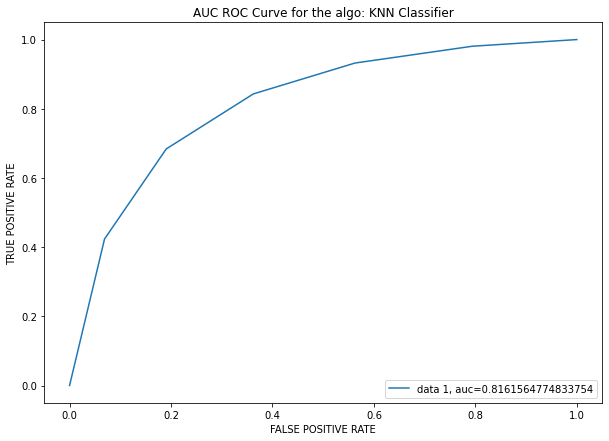

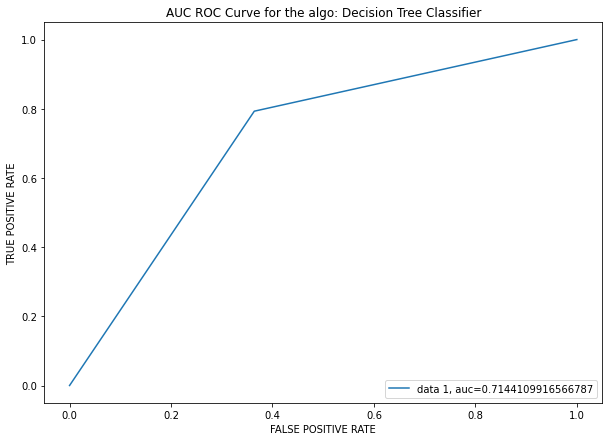

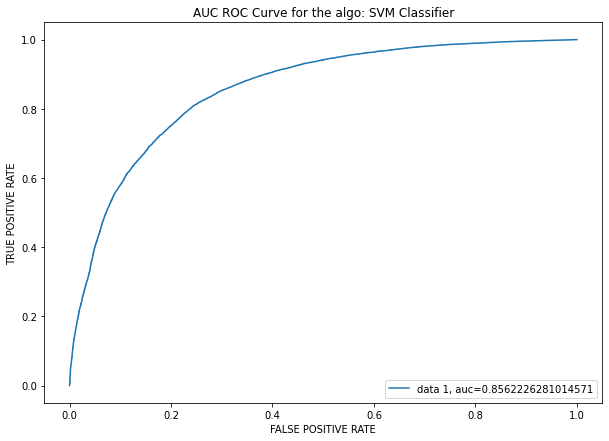

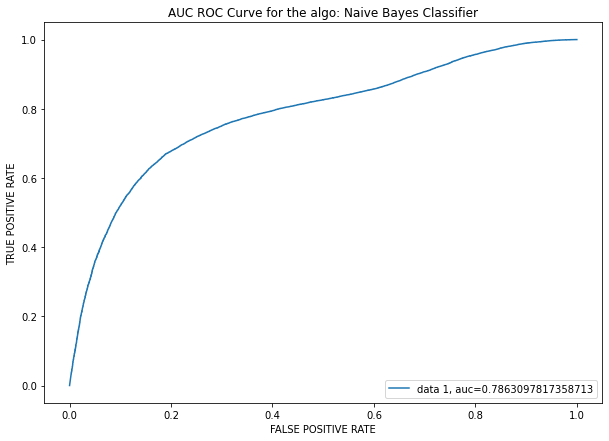

In [9]:
#write your code here
x_train=df_train.iloc[:, :-1]
y_train=df_train.iloc[:, -1:]
x_test=df_test.iloc[:, :-1]
y_test=df_test.iloc[:, -1:]

clf1=KNeighborsClassifier()
clf1.fit(x_train, y_train)

clf2=DecisionTreeClassifier()
clf2.fit(x_train, y_train)

clf3=SVC(probability=True)
clf3.fit(x_train, y_train)

clf4=GaussianNB()
clf4.fit(x_train, y_train)

auc_curve_calculator(x_test, y_test, clf1, "KNN Classifier")
auc_curve_calculator(x_test, y_test, clf2, "Decision Tree Classifier")
auc_curve_calculator(x_test, y_test, clf3, "SVM Classifier")
auc_curve_calculator(x_test, y_test, clf4, "Naive Bayes Classifier")

4\. Which of the two models is generally better at ranking the test set? Are there any classification thresholds where the model identified above as "better" would underperform the other in any classification metric (such as recall)? (3 points)


#### Response:

In the case of KNN vs Naive Bayes, KNN surpasses in the latter model in ranking the test set as the the area under curve for KNN is more than that of the Naive Bayes. KNN's AUC is ~ 0.82 and Naive Bayes AUC is ~ 0.79. Whereas, the metric where the better model (KNN) would under perform in other classification metric would be in the case of Recall score. Naive bayes has the recall score of ~ 0.88 whereas KNN has the recall score of ~ 0.84. The analysis is shown below.

**Write your analysis here.**

[0.8429210951061302, 0.792977433992143, 0.8917379784998629, 0.8770594146846545]


Text(0.5, 1.0, 'Recall values for the different models')

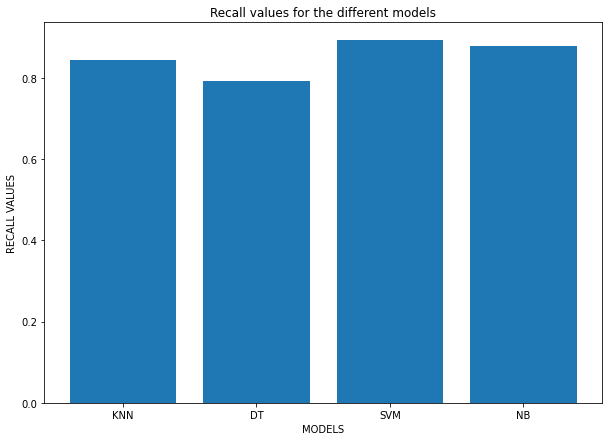

In [10]:
def recall_calculator(x_test, y_test, model, model_name):
    y_pred= model.predict(x_test)
    recall=recall_score(y_test,  y_pred)
    return recall

recalls=[]
models=["KNN", "DT", "SVM", "NB"]

recalls.append(recall_calculator(x_test, y_test, clf1, "KNN Classifier"))
recalls.append(recall_calculator(x_test, y_test, clf2, "Decision Tree Classifier"))
recalls.append(recall_calculator(x_test, y_test, clf3, "SVM Classifier"))
recalls.append(recall_calculator(x_test, y_test, clf4, "Naive Bayes Classifier"))

print(recalls)
plt.figure(figsize=(10, 7))
plt.bar(models, recalls)
plt.xlabel("MODELS")
plt.ylabel("RECALL VALUES")
plt.title("Recall values for the different models")